# Kaggle Tabular Playground Series - Januar 2021

All features and target are numerical => this is a regression problem

In [1]:
# load input data

import pandas as pd

train_df = pd.read_csv("input/train.csv")
X_train = train_df.drop(columns=["target"])
y_train = train_df[["target"]]

X_test = pd.read_csv("input/test.csv")

## Exploratory Data Analysis

In [2]:
train_df.head(10)

id     cont1     cont2     cont3     cont4     cont5     cont6     cont7  \
0   1  0.670390  0.811300  0.643968  0.291791  0.284117  0.855953  0.890700   
1   3  0.388053  0.621104  0.686102  0.501149  0.643790  0.449805  0.510824   
2   4  0.834950  0.227436  0.301584  0.293408  0.606839  0.829175  0.506143   
3   5  0.820708  0.160155  0.546887  0.726104  0.282444  0.785108  0.752758   
4   8  0.935278  0.421235  0.303801  0.880214  0.665610  0.830131  0.487113   
5   9  0.352623  0.258867  0.327373  0.802627  0.284219  0.296886  0.209743   
6  11  0.259096  0.803934  0.580900  0.322884  0.984705  0.378247  0.432821   
7  12  0.481610  0.805446  0.235836  0.365011  0.734725  0.404825  0.465061   
8  13  0.667920  0.776422  0.255154  0.869598  0.678067  0.475274  0.493290   
9  15  0.937751  0.236482  0.216445  0.476463  0.283642  0.456763  0.316416   

      cont8     cont9    cont10    cont11    cont12    cont13    cont14  \
0  0.285542  0.558245  0.779418  0.921832  0.866772  0.878733  0.305411   
1  0.580748  0.418335  0.432632  0.439872  0.434971  0.369957  0.369484   
2  0.558771  0.587603  0.823312  0.567007  0.677708  0.882938  0.303047   
3  0.823267  0.574466  0.580843  0.769594  0.818143  0.914281  0.279528   
4  0.604157  0.874658  0.863427  0.983575  0.900464  0.935918  0.435772   
5  0.273710  0.308018  0.235851  0.278760  0.251406  0.339135  0.293129   
6  0.562059  0.290965  0.316543  0.219192  0.326977  0.458653  0.244300   
7  0.578794  0.418807  0.451958  0.458720  0.586586  0.321026  0.834694   
8  0.638779  0.491023  0.617451  0.413352  0.485558  0.474055  0.608374   
9  0.785602  0.695845  0.370941  0.436835  0.826278  0.856748  0.418593   

     target  
0  7.243043  
1  8.203331  
2  7.776091  
3  6.957716  
4  7.951046  
5  7.346874  
6  8.616237  
7  6.833895  
8  8.540793  
9  7.701053

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cont1   300000 non-null  float64
 2   cont2   300000 non-null  float64
 3   cont3   300000 non-null  float64
 4   cont4   300000 non-null  float64
 5   cont5   300000 non-null  float64
 6   cont6   300000 non-null  float64
 7   cont7   300000 non-null  float64
 8   cont8   300000 non-null  float64
 9   cont9   300000 non-null  float64
 10  cont10  300000 non-null  float64
 11  cont11  300000 non-null  float64
 12  cont12  300000 non-null  float64
 13  cont13  300000 non-null  float64
 14  cont14  300000 non-null  float64
 15  target  300000 non-null  float64
dtypes: float64(15), int64(1)
memory usage: 36.6 MB


In [4]:
train_df.describe()

id          cont1          cont2          cont3  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean   249825.145857       0.506873       0.497898       0.521557   
std    144476.732562       0.203976       0.228159       0.200770   
min         1.000000      -0.082263      -0.031397       0.020967   
25%    124656.500000       0.343078       0.319170       0.344096   
50%    249738.500000       0.484005       0.553209       0.551471   
75%    374836.250000       0.643789       0.731263       0.648315   
max    499999.000000       1.016227       0.859697       1.006955   

               cont4          cont5          cont6          cont7  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean        0.515683       0.502022       0.526515       0.487890   
std         0.233035       0.220701       0.217909       0.181096   
min         0.152761       0.276377       0.066166      -0.097666   
25%         0.294935       0.284108       0.356163       0.346600   
50%         0.482880       0.451733       0.470988       0.466825   
75%         0.748705       0.670660       0.694043       0.581292   
max         1.010402       1.034261       1.043858       1.066167   

               cont8          cont9         cont10         cont11  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean        0.525163       0.459857       0.520532       0.483926   
std         0.216221       0.196685       0.201854       0.220082   
min         0.217260      -0.240604      -0.085046       0.083277   
25%         0.341486       0.330832       0.375465       0.300474   
50%         0.483460       0.416843       0.458877       0.441916   
75%         0.685250       0.575041       0.700292       0.679128   
max         1.024427       1.004114       1.199951       1.022620   

              cont12         cont13         cont14         target  
count  300000.000000  300000.000000  300000.000000  300000.000000  
mean        0.506877       0.553442       0.503713       7.905661  
std         0.218947       0.229730       0.208238       0.733071  
min         0.088635       0.029950       0.166367       0.000000  
25%         0.310166       0.350472       0.308673       7.329367  
50%         0.486599       0.487707       0.431845       7.940571  
75%         0.694453       0.768479       0.712653       8.470084  
max         1.049025       0.977845       0.868506      10.267569

In [5]:
train_df.corr

<bound method DataFrame.corr of             id     cont1     cont2     cont3     cont4     cont5     cont6  \
0            1  0.670390  0.811300  0.643968  0.291791  0.284117  0.855953   
1            3  0.388053  0.621104  0.686102  0.501149  0.643790  0.449805   
2            4  0.834950  0.227436  0.301584  0.293408  0.606839  0.829175   
3            5  0.820708  0.160155  0.546887  0.726104  0.282444  0.785108   
4            8  0.935278  0.421235  0.303801  0.880214  0.665610  0.830131   
...        ...       ...       ...       ...       ...       ...       ...   
299995  499995  0.216974  0.735265  0.648648  0.255387  0.616353  0.345197   
299996  499996  0.545799  0.165139  0.220966  0.190053  0.359362  0.386336   
299997  499997  0.284401  0.841542  0.957585  0.340383  0.396279  0.330376   
299998  499998  0.481900  0.622346  0.540032  0.823118  0.283066  0.434283   
299999  499999  0.486632  0.230090  0.543587  0.263878  0.279118  0.636295   

           cont7     cont8     

Text(0.5, 1.0, 'Heatmap: Correlation of numeric features')

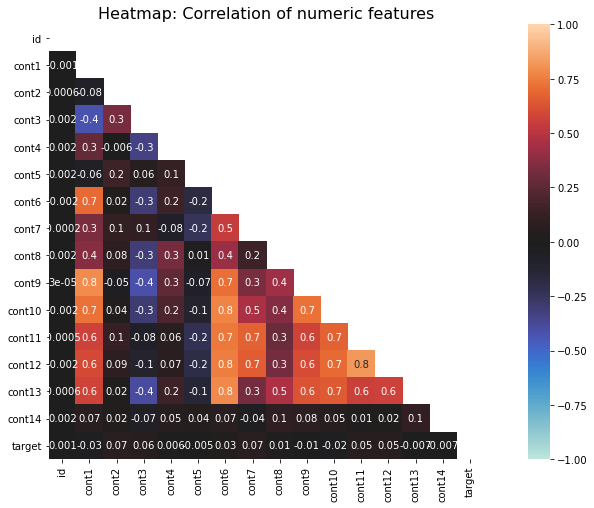

In [6]:
# correlation between all numeric attributes
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,8))
matrix = np.triu(train_df.corr())
sns.heatmap(train_df.corr(), annot=True, fmt=".1g", 
            vmin=-1, vmax=1, center=0, 
            cmap="icefire", square=True, mask=matrix)
plt.title("Heatmap: Correlation of numeric features", size=16)

## Model Building & Experimentation

#### Shortlist:
- Linear Regression with Polynomial feature transformation
- Ridge Regression
- Lasso Regression
- SVM Regression
- Random Forest Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# simple OLS model
ols_reg = LinearRegression()
print("Simple OLS model")

# cross validation scores on training data
from sklearn.model_selection import cross_val_score

cv_ols_reg = cross_val_score(ols_reg, X_train, y_train, cv=5)
print("mean cv accuracy: " + str(round(cv_ols_reg.mean(),4)))

# other performance metrics
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

ols_reg.fit(X_train, y_train)
y_train_pred = ols_reg.predict(X_train)

print("explained_variance_score: " + str(round(explained_variance_score(y_train, y_train_pred),4)))
print("r2_score: " + str(round(r2_score(y_train, y_train_pred),4)))
print("mean_absolute_error: " + str(round(mean_absolute_error(y_train, y_train_pred),4)))
print("mean_squared_error: " + str(round(mean_squared_error(y_train, y_train_pred),4)))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# OLS with polynomial transformation, degree = 2
poly_ols_reg = Pipeline([
    ("poly_transform", PolynomialFeatures(2)),
    ("ols_reg", LinearRegression()),
])
print("Poly-transformed OLS model (degree=2)")

# cross validation scores on training data
from sklearn.model_selection import cross_val_score

cv_poly_ols_reg = cross_val_score(poly_ols_reg, X_train, y_train, cv=3)
print("mean cv accuracy: " + str(round(cv_poly_ols_reg.mean(),4)))

# other performance metrics
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

poly_ols_reg.fit(X_train, y_train)
y_train_pred = poly_ols_reg.predict(X_train)

print("explained_variance_score: " + str(round(explained_variance_score(y_train, y_train_pred),4)))
print("r2_score: " + str(round(r2_score(y_train, y_train_pred),4)))
print("mean_absolute_error: " + str(round(mean_absolute_error(y_train, y_train_pred),4)))
print("mean_squared_error: " + str(round(mean_squared_error(y_train, y_train_pred),4)))


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# OLS with polynomial transformation, degree = 4
poly_ols_reg = Pipeline([
    ("poly_transform", PolynomialFeatures(4)),
    ("ols_reg", LinearRegression()),
], verbose=True)

print("Poly-transformed OLS model (degree=4)")

# cross validation scores on training data
from sklearn.model_selection import cross_val_score

cv_poly_ols_reg = cross_val_score(poly_ols_reg, X_train, y_train, cv=3)
print("mean cv accuracy: " + str(round(cv_poly_ols_reg.mean(),4)))

# other performance metrics
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

poly_ols_reg.fit(X_train, y_train)
y_train_pred = poly_ols_reg.predict(X_train)

print("explained_variance_score: " + str(round(explained_variance_score(y_train, y_train_pred),4)))
print("r2_score: " + str(round(r2_score(y_train, y_train_pred),4)))
print("mean_absolute_error: " + str(round(mean_absolute_error(y_train, y_train_pred),4)))
print("mean_squared_error: " + str(round(mean_squared_error(y_train, y_train_pred),4)))

Poly-transformed OLS model (degree=4)
[Pipeline] .... (step 1 of 2) Processing poly_transform, total=   6.9s
[Pipeline] ........... (step 2 of 2) Processing ols_reg, total= 2.5min
[Pipeline] .... (step 1 of 2) Processing poly_transform, total=   4.5s
